In [1]:
## CoderGirl Data Science Week 22 - Project 1: Exploratory Data Analysis
## 19 June 2019

['heart.csv']


In [ ]:
## Import lots of things

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, auc, classification_report ##-1,2
from mlxtend.classifier import StackingClassifier
from xgboost import XGBClassifier

In [30]:
df = pd.read_csv('../input/heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [49]:
## Rename columns to legible names

In [43]:
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ecg', 'max_heart_rate_achieved',
       'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia', 'target']

In [44]:
#check
df.describe()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ecg,max_heart_rate_achieved,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


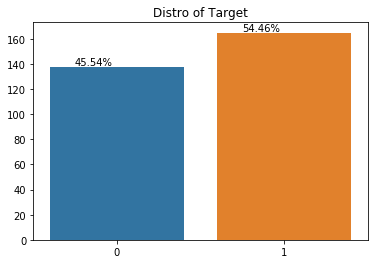

In [46]:
## Heart Disease vs. Not Heart Disease Distro
fig, ax = plt.subplots()
sns.countplot(df.target, ax=ax)
for i,p in enumerate(ax.patches):
    ax.annotate('{:.2f}%'.format(df['target'].value_counts().apply(lambda x: 100*x/df['target'].value_counts().sum())[i]), (p.get_x()+0.15, p.get_height()+1)).set_fontsize(10)
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Distro of Target");

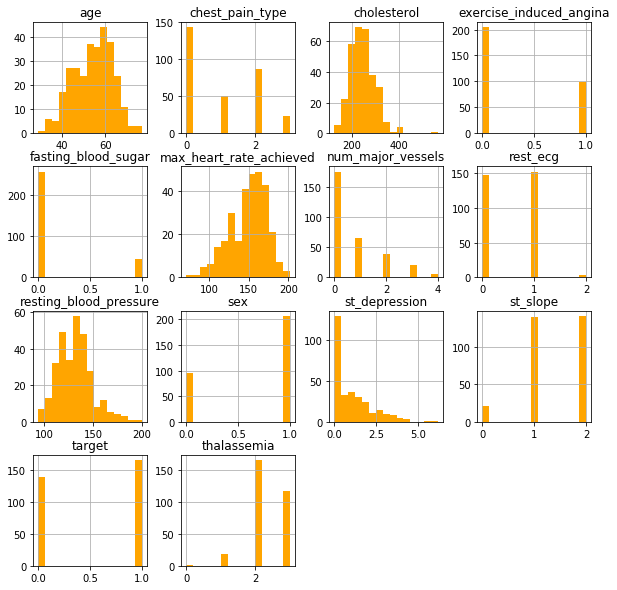

In [47]:
## Histrogram of columns
fig, ax = plt.subplots(figsize=[10,10])
df.hist(ax=ax, bins=15, color='orange');

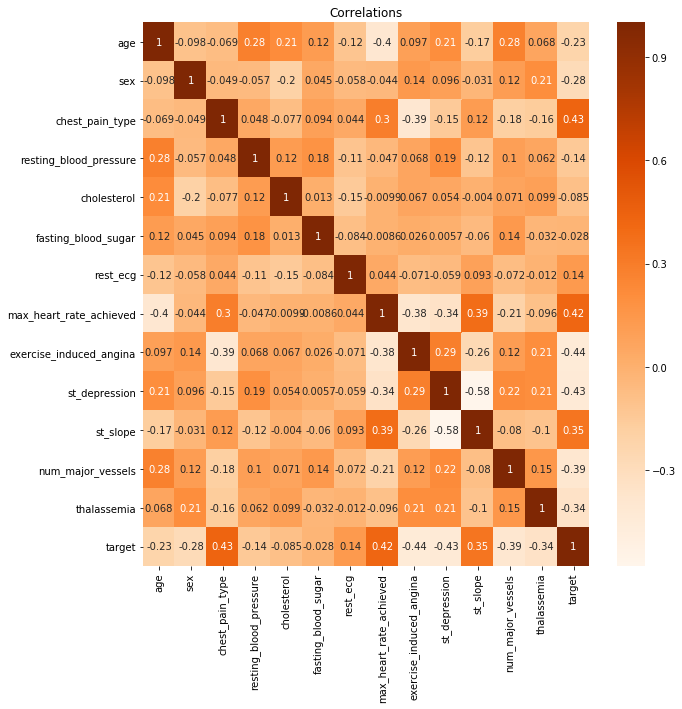

In [55]:
fig, ax = plt.subplots(figsize=[10,10])
sns.heatmap(df.corr(), ax=ax, cmap='Oranges', annot=True);
ax.set_title("Correlations", size=12);

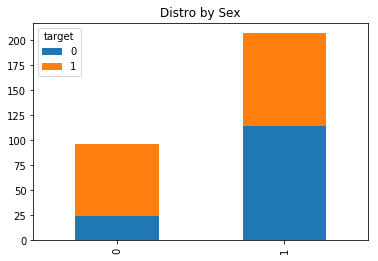

In [57]:
## Distro by Sex
fig, ax = plt.subplots()
df.groupby(['sex', 'target']).size().reset_index().pivot(index='sex', columns='target', values=0).fillna(0).plot.bar(stacked=True, ax=ax)
ax.set_title("Distro by Sex")
ax.set_xlabel("");

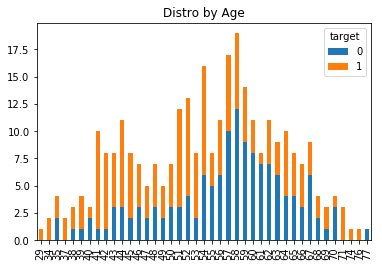

In [50]:
## Distro by Age
fig, ax = plt.subplots()
df.groupby(['age', 'target']).size().reset_index().pivot(index='age', columns='target', values=0).fillna(0).plot.bar(stacked=True, ax=ax)
ax.set_title("Distro by Age")
ax.set_xlabel("");

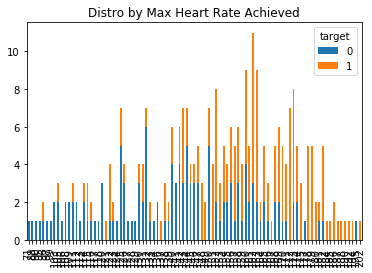

In [62]:
## Distro by Max Heart Rate Achieved
fig, ax = plt.subplots()
df.groupby(['max_heart_rate_achieved', 'target']).size().reset_index().pivot(index='max_heart_rate_achieved', columns='target', values=0).fillna(0).plot.bar(stacked=True, ax=ax)
ax.set_title("Distro by Max Heart Rate Achieved")
ax.set_xlabel("");

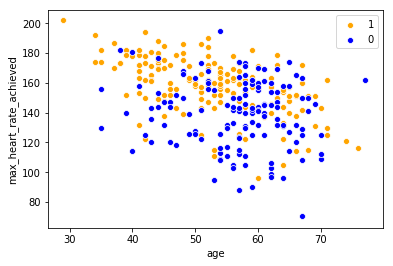

In [63]:
## Scatterplot - Age & Max Heart Rate Achieved
fig, ax = plt.subplots()
sns.scatterplot(x='age', y='max_heart_rate_achieved', data=df[df.target==1], color='orange', ax=ax)
sns.scatterplot(x='age', y='max_heart_rate_achieved', data=df[df.target==0], color='blue', ax=ax)
ax.legend(['1', '0']);